In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

illoqqortoormiut gl
hobart au
san rafael ar
illoqqortoormiut gl
taolanaro mg
chabahar ir
port elizabeth za
cherskiy ru
clyde river ca
shubarshi kz
klaksvik fo
souillac mu
cape town za
kavaratti in
sarkand kz
zhicheng cn
meulaboh id
kapaa us
alta no
arlit ne
manacapuru br
albany au
rikitea pf
rikitea pf
angelholm se
latung ph
brooks ca
mao td
sitka us
zarand ir
sharan af
pontian kecil my
hithadhoo mv
port alfred za
atuona pf
punta arenas cl
narsaq gl
tateyama jp
taolanaro mg
semlac ro
cockburn town bs
new norfolk au
amderma ru
bredasdorp za
mega et
bur gabo so
port hardy ca
hermanus za
khatanga ru
tiksi ru
taolanaro mg
punta arenas cl
busselton au
pevek ru
upernavik gl
port alfred za
nanortalik gl
kidal ml
bethel us
luderitz na
yellowknife ca
niquelandia br
hithadhoo mv
coihaique cl
punta arenas cl
tura ru
taoudenni ml
bosanska gradiska ba
punta arenas cl
bambous virieux mu
mataura pf
tsihombe mg
hermanus za
bilma ne
kutum sd
busselton au
albany au
atuona pf
hermanus za
esfahan ir
alban

san quintin mx
loukhi ru
tocopilla cl
mys shmidta ru
kloulklubed pw
acarau br
dikson ru
aykhal ru
lebu cl
jamestown sh
vaitupu wf
jamestown sh
ushuaia ar
naftah tn
emerald au
angoram pg
hermanus za
vardo no
jinchengjiang cn
la ronge ca
khatanga ru
saskylakh ru
bengkulu id
dwarka in
cape town za
taolanaro mg
aklavik ca
ushuaia ar
qaanaaq gl
rikitea pf
vaini to
illoqqortoormiut gl
punta arenas cl
turayf sa
ushuaia ar
san vicente cl
hermanus za
mataura pf
palabuhanratu id
dianopolis br
tuatapere nz
atuona pf
codrington ag
provideniya ru
emerald au
sao felix do xingu br
plouzane fr
san cristobal ec
nemuro jp
salalah om
pahrump us
edremit tr
kodiak us
rikitea pf
barrow us
punta arenas cl
honningsvag no
avarua ck
wheatley ca
mount isa au
tautira pf
desaguadero pe
domoni km
sao miguel do guama br
williston us
punta arenas cl
damaturu ng
mys shmidta ru
atuona pf
mananara mg
taolanaro mg
port elizabeth za
new norfolk au
qaanaaq gl
rikitea pf
kavaratti in
namibe ao
gushikawa jp
poum nc
camopi gf

chuy uy
bambous virieux mu
hithadhoo mv
iwanai jp
cayenne gf
ancud cl
mataura pf
ushuaia ar
mataura pf
bubaque gw
tual id
betioky mg
punta arenas cl
mahebourg mu
victoria sc


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [12]:
# Import the API key.
from config import weather_api_key

In [13]:
# Import the requests library.
import requests
requests.__version__

'2.25.1'

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=16b224c0070c5a33fa29bdfa742085ea


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | san rafael
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | chabahar
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | shubarshi
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | sarkand
Processing Record 15 of Set 1 | zhicheng
Processing Record 16 of Set 1 | meulaboh
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | alta
Processing Record 19 of Set 1 | arlit
Processing Record 20 of Set 1 | manacapuru
Processing Record 21 of Set 1 | albany
Processing Record 22 o

Processing Record 40 of Set 4 | harwich
Processing Record 41 of Set 4 | takoradi
Processing Record 42 of Set 4 | rio gallegos
Processing Record 43 of Set 4 | murchison
Processing Record 44 of Set 4 | novyy yarychiv
Processing Record 45 of Set 4 | moerai
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | vanavara
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | clinton
Processing Record 50 of Set 4 | haines junction
Processing Record 1 of Set 5 | harper
Processing Record 2 of Set 5 | raudeberg
Processing Record 3 of Set 5 | christchurch
Processing Record 4 of Set 5 | belaya gora
Processing Record 5 of Set 5 | liverpool
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | kirakira
Processing Record 9 of Set 5 | vanimo
Processing Record 10 of Set 5 | san quintin
Processing Record 11 of Set 5 | isangel
Processing Record 12 of Set 5 | nikolayevsk-na-amure
Processing Record 13 of 

Processing Record 23 of Set 8 | ahipara
Processing Record 24 of Set 8 | ossora
Processing Record 25 of Set 8 | baruun-urt
Processing Record 26 of Set 8 | aldergrove
Processing Record 27 of Set 8 | alekseyevsk
Processing Record 28 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 29 of Set 8 | lano
Processing Record 30 of Set 8 | korla
Processing Record 31 of Set 8 | ternate
Processing Record 32 of Set 8 | turbat
Processing Record 33 of Set 8 | pamanukan
Processing Record 34 of Set 8 | sibolga
Processing Record 35 of Set 8 | pilani
Processing Record 36 of Set 8 | puerto suarez
Processing Record 37 of Set 8 | pilar
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | sobolevo
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | amalapuram
Processing Record 43 of Set 8 | zaragoza
Processing Record 44 of Set 8 | hervey bay
Processing Record 45 of Set 8 | najran
Processing Record 4

Processing Record 13 of Set 12 | saint-pierre
Processing Record 14 of Set 12 | mbanza-ngungu
Processing Record 15 of Set 12 | porto santo
Processing Record 16 of Set 12 | tashtyp
Processing Record 17 of Set 12 | atyrau
Processing Record 18 of Set 12 | igbo ora
Processing Record 19 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 20 of Set 12 | pital
Processing Record 21 of Set 12 | gonbad-e qabus
Processing Record 22 of Set 12 | megion
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | sovetskaya
Processing Record 25 of Set 12 | tetiyiv
Processing Record 26 of Set 12 | galle
Processing Record 27 of Set 12 | dongzhen
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | alyangula
Processing Record 30 of Set 12 | milkovo
Processing Record 31 of Set 12 | houma
Processing Record 32 of Set 12 | kuche
City not found. Skipping...
Processing Record 33 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 34 of Set 12 | u

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,48.25,94,90,3.00,AU,2021-10-23 18:50:06
1,San Rafael,-34.6177,-68.3301,74.89,15,0,14.38,AR,2021-10-23 18:51:43
2,Chabahar,25.2919,60.6430,78.76,80,0,4.74,IR,2021-10-23 18:47:33
3,Port Elizabeth,-33.9180,25.5701,61.09,67,0,21.85,ZA,2021-10-23 18:51:29
4,Cherskiy,68.7500,161.3000,-1.66,99,98,2.39,RU,2021-10-23 18:51:42
5,Clyde River,70.4692,-68.5914,22.91,79,94,17.16,CA,2021-10-23 18:51:44
6,Shubarshi,48.5872,57.1869,48.90,44,6,9.51,KZ,2021-10-23 18:51:44
7,Klaksvik,62.2266,-6.5890,51.84,96,100,22.48,FO,2021-10-23 18:51:44
8,Souillac,-20.5167,57.5167,74.35,83,40,10.36,MU,2021-10-23 18:51:45
9,Cape Town,-33.9258,18.4232,61.27,69,75,1.01,ZA,2021-10-23 18:44:58


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-10-23 18:50:06,-42.8794,147.3294,48.25,94,90,3.00
1,San Rafael,AR,2021-10-23 18:51:43,-34.6177,-68.3301,74.89,15,0,14.38
2,Chabahar,IR,2021-10-23 18:47:33,25.2919,60.6430,78.76,80,0,4.74
3,Port Elizabeth,ZA,2021-10-23 18:51:29,-33.9180,25.5701,61.09,67,0,21.85
4,Cherskiy,RU,2021-10-23 18:51:42,68.7500,161.3000,-1.66,99,98,2.39
5,Clyde River,CA,2021-10-23 18:51:44,70.4692,-68.5914,22.91,79,94,17.16
6,Shubarshi,KZ,2021-10-23 18:51:44,48.5872,57.1869,48.90,44,6,9.51
7,Klaksvik,FO,2021-10-23 18:51:44,62.2266,-6.5890,51.84,96,100,22.48
8,Souillac,MU,2021-10-23 18:51:45,-20.5167,57.5167,74.35,83,40,10.36
9,Cape Town,ZA,2021-10-23 18:44:58,-33.9258,18.4232,61.27,69,75,1.01


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

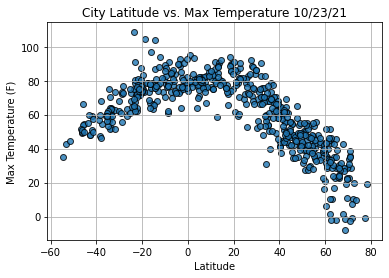

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

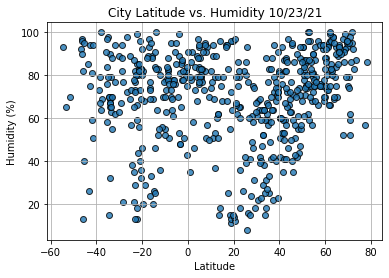

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

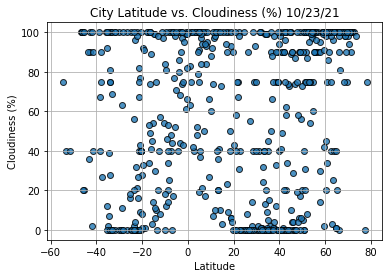

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

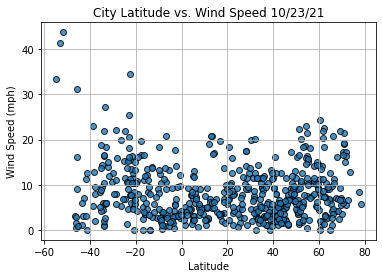

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Chabahar,IR,2021-10-23 18:47:33,25.2919,60.6430,78.76,80,0,4.74
4,Cherskiy,RU,2021-10-23 18:51:42,68.7500,161.3000,-1.66,99,98,2.39
5,Clyde River,CA,2021-10-23 18:51:44,70.4692,-68.5914,22.91,79,94,17.16
6,Shubarshi,KZ,2021-10-23 18:51:44,48.5872,57.1869,48.90,44,6,9.51
7,Klaksvik,FO,2021-10-23 18:51:44,62.2266,-6.5890,51.84,96,100,22.48


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

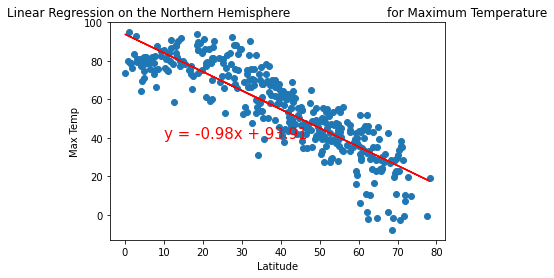

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

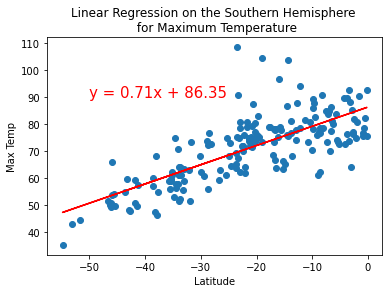

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

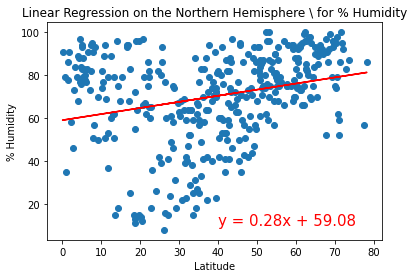

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

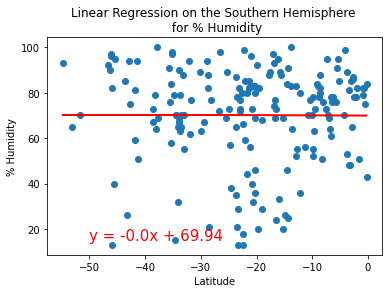

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

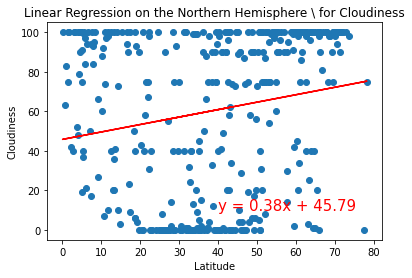

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Cloudiness', 'Cloudiness',(40,10))

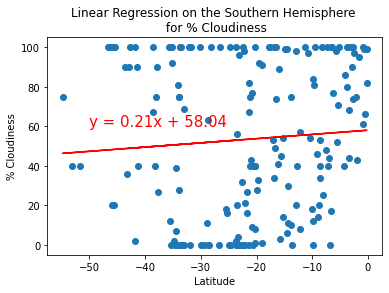

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

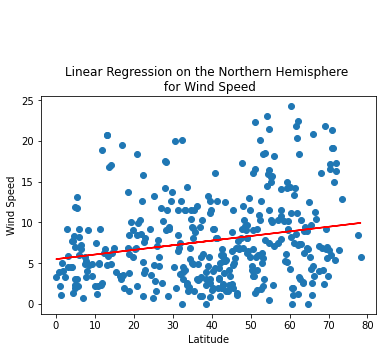

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

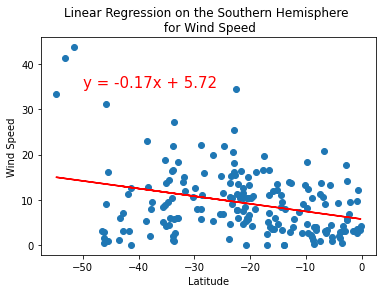

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))